In [1]:
# Importing necessary modules from the segment_anything package for SAM model
from segment_anything import sam_model_registry, SamPredictor
%matplotlib inline

# Importing essential libraries for deep learning and visualization
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

/Users/rpatel/anaconda3/envs/segmentation/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


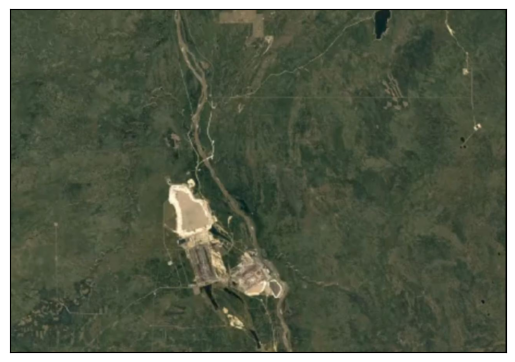

In [2]:
# Assuming you have the necessary imports
image_path = '/Users/rpatel/Desktop/6-sem/Digital Humanities/mining.jpeg'
image = plt.imread(image_path)  # Read the image using Matplotlib

plt.imshow(image)  # Display the image using Matplotlib
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()  # Show the image plot

In [3]:
# Load pre-trained model checkpoint for Vision Transformer model from a web address
sam_checkpoint = "sam_vit_h_4b8939.pth" # In case you are not utilizing Google Colab, it is recommended that you obtain the SAM checkpoints from this web address: 
                                        #https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
# Specify the type of Vision Transformer model to use
model_type = "vit_h"
# Specify the device to use for computation (CPU or GPU)
device = "cpu" # If you have gpu on your computer and is campatibale with torch you cand change "cpu" to "cuda".
                # In order to check torch is compatible with torch in your system you can use torch.cuda.is_available().
                # If it returns True, you can use cuda.

# Initialize segmentation model using a factory function with the loaded checkpoint as an argument
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
# Move the segmentation model to the specified device
sam.to(device=device)
# Create predictor object for the segmentation model
predictor = SamPredictor(sam)

In [4]:
# Set the image for prediction using the SAM predictor object
image = (image * 255).astype(np.uint8)
predictor.set_image(image)

In [ ]:
# IPython magic command to configure how plots are displayed
%matplotlib
%matplotlib

In [5]:
%matplotlib notebook


In [6]:
# Initialize empty lists to store clicked points and their labels
points = []
labels = []
def onclick(event): # Define a function to handle mouse clicks on the image
    if event.key == 'A': # Check if the key pressed is 'A'
        # Access global variables for points and labels
        global points
        global labels
    
        x = int(round(event.xdata)) # Extract x coordinate of the click
        y = int(round(event.ydata)) # Extract y coordinate of the click
        
        ax.plot(x, y, 'o', markersize=4, color='red') # Plot a red circle at the clicked point on the image
        plt.show() # Display the updated plot        
        # Store the coordinates in the points list along with a label (in this case, the label is set to 1)
        points.append([x, y])
        labels.append(1)

In [7]:
# Create a subplot
ax = plt.subplot(111)
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
# Connect the mouse click event to the 'onclick()' function
cid = plt.gcf().canvas.mpl_connect('button_press_event', onclick)
# Show the plot
plt.show()

<IPython.core.display.Javascript object>

In [23]:
# Convert the lists of clicked points and labels into NumPy arrays
points = np.array(points)
labels = np.array(labels)

# Use the predictor object to predict masks, scores, and logits
# The 'multimask_output=True' argument indicates that the model should generate multiple masks
masks, scores, logits = predictor.predict(
    point_coords=points,
    point_labels=labels,
    multimask_output=True,
)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [21]:
def show_mask(mask, ax, random_color=True):
    # Check if random color is requested
    if random_color:
        # Generate a random color with alpha value for the mask
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        # Use a default shade of blue with alpha value for the mask
        color = np.array([30/255, 144/255, 255/255, 0.6])
    # Get the height and width of the mask
    h, w = mask.shape[-2:]
    # Reshape the mask into an RGB image by multiplying it element-wise with the color array
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    # Display the colored mask on the provided matplotlib axis
    ax.imshow(mask_image)

In [22]:
# Iterate over pairs of masks and scores using enumerate and zip
for i, (mask, score) in enumerate(zip(masks, scores)):
    
    plt.figure(figsize=(10, 10)) # Create a new matplotlib figure
    
    plt.imshow(image) # Display the original image
    
    # Use the show_mask function to display the current mask on the same figure
    show_mask(mask, plt.gca())
    
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18) # Set the title including the mask index and its score
    
    plt.axis('off') # Turn off the axis for a cleaner appearance

    # Show the figure
    plt.show()

NameError: name 'masks' is not defined

In [1]:
import cv2
from segment_anything import segment_anything

def segment_image(image_path):
    # Load the input image
    image = cv2.imread(image_path)

    # Preprocess the image if necessary (e.g., resize, convert to RGB)

    # Segment the image
    mask = segment_anything(image)

    return mask

def display_segmentation(image, mask):
    # Display the original image and segmentation mask
    cv2.imshow("Original Image", image)
    cv2.imshow("Segmentation Mask", mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def save_segmentation(image_path, mask):
    # Save the segmentation mask
    cv2.imwrite("segmentation_mask.png", mask)

if __name__ == "__main__":
    # Input image path
    image_path = "/Users/rpatel/Desktop/6-sem/Digital Humanities/sample1.png"

    # Segment the image
    mask = segment_image(image_path)

    # Display or save the segmentation mask
    display_segmentation(cv2.imread(image_path), mask)
    # save_segmentation(image_path, mask)


/Users/rpatel/anaconda3/envs/segmentation/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'segment_anything' from 'segment_anything' (/Users/rpatel/anaconda3/envs/segmentation/lib/python3.10/site-packages/segment_anything/__init__.py)

In [ ]:
import cv2

def segment_image(image_path):
    # Load the input image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to segment the image
    _, binary_mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    return binary_mask

def display_segmentation(image, mask):
    # Display the original image and segmentation mask
    cv2.imshow("Original Image", image)
    cv2.imshow("Segmentation Mask", mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def save_segmentation(mask):
    # Save the segmentation mask
    cv2.imwrite("segmentation_mask.png", mask)

if __name__ == "__main__":
    # Input image path
    image_path = "/Users/rpatel/Desktop/6-sem/Digital Humanities/frames/frames_brazil/output_frames_0019.png"

    # Segment the image
    mask = segment_image(image_path)

    # Display or save the segmentation mask
    display_segmentation(cv2.imread(image_path), mask)
    # save_segmentation(mask)


: 

In [4]:
import numpy as np
import tensorflow as tf
from PIL import Image
import urllib.request

# Download sample satellite image
image_url = "https://i0.wp.com/newspaceeconomy.ca/wp-content/uploads/2023/10/newspaceeconomy_an_image_that_symbolizes_the_segment_anything_p_d26ae501-b201-4345-854f-b9ed2496dabc.jpg?w=1024&ssl=1"
urllib.request.urlretrieve(image_url, "sample_satellite_image.jpg")

# Load the pretrained DeepLabv3 model from TensorFlow Hub
deeplab_module = "https://tfhub.dev/google/deeplabv3/1"
model = tf.keras.Sequential([
    hub.KerasLayer(deeplab_module, output_shape=[None, None, 21])
])

# Load and preprocess the satellite image
image = Image.open("sample_satellite_image.jpg")
image = image.resize((512, 512))  # Resize image to match model input size
image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Perform segmentation
predictions = model.predict(image_array)

# Post-process the predictions to get segmentation mask
mask = predictions.argmax(axis=-1)[0]

# Visualize the segmentation mask
segmentation_image = Image.fromarray(mask.astype(np.uint8))
segmentation_image.show()


NameError: name 'hub' is not defined

In [ ]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_b"](checkpoint="/kaggle/input/segment-anything/pytorch/vit-b/1/model.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(<your_image>)


In [6]:
import os
import cv2

def segment_image(image_path):
    # Load the input image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to segment the image
    _, binary_mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    return binary_mask

def save_segmentation(mask, image_path):
    # Extract filename without extension
    filename = os.path.splitext(os.path.basename(image_path))[0]

    # Save the segmentation mask with the same filename as the original image
    cv2.imwrite(f"{filename}_segmentation_mask.png", mask)

if __name__ == "__main__":
    # Input directory containing images
    input_dir = "/Users/rpatel/Desktop/6-sem/Digital Humanities/frames/frames_bolivia/"
    
    # Iterate through each image in the directory
    for filename in os.listdir(input_dir):
        if filename.endswith(".png"):
            image_path = os.path.join(input_dir, filename)
            # Segment the image
            mask = segment_image(image_path)
            # Save the segmentation mask
            save_segmentation(mask, image_path)
